### Preprocessing Steps

In [1]:
### 1. importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing datasets
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)
train.shape,test.shape

((9557, 142), (23856, 141))

In [3]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
# Chekcing categorical column in train & test dataset
train.describe(include = 'object')

,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557
unique,2988,31,22,22
top,fd8a6d014,yes,no,no
freq,13,2192,3762,6230


In [6]:
test.describe(include = 'object')

,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856
unique,7352,35,22,22
top,830539cad,yes,no,no
freq,13,5388,9056,15845


In [7]:
#Preprocessing for 4 categorical column

# identifying the unique values
train['idhogar'].unique()

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

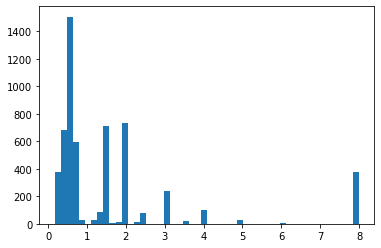

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
Name: dependency, dtype: int64

In [8]:
# preprocessing dependency column
data = train['dependency']
plt.hist(data[data.isin(['no','yes'])==False].astype('float'),bins=50)
plt.show()


data.value_counts().head(10)

In [9]:
# Converting yes & no to numeric values ---> Both train & test datasets
train['dependency'] = train['dependency'].replace('no',0).replace('yes',0.5).astype('float')
test['dependency'] = test['dependency'].replace('no',0).replace('yes',0.5).astype('float')


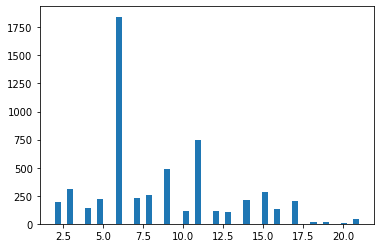

no    3762
6     1845
11     751
9      486
3      307
15     285
8      257
7      234
5      222
14     208
Name: edjefe, dtype: int64

In [10]:
# preprocessing edjefe column
data = train['edjefe']
plt.hist(data[data.isin(['no','yes'])==False].astype('float'),bins=50)
plt.show()


data.value_counts().head(10)

In [11]:
# Converting yes & no to numeric values, No = 0, yes = median ---> Both train & test datasets
med = np.median(train.edjefe[train.edjefe.isin(['no','yes'])==False].astype('float'))

train['edjefe'] = train['edjefe'].replace('no',0).replace('yes',med).astype('float')
test['edjefe'] = test['edjefe'].replace('no',0).replace('yes',med).astype('float')


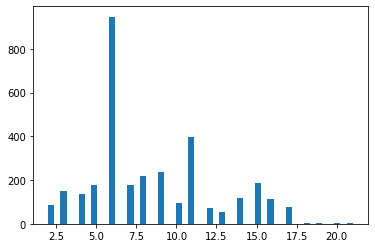

no    6230
6      947
11     399
9      237
8      217
15     188
7      179
5      176
3      152
4      136
Name: edjefa, dtype: int64

In [12]:
# preprocessing edjefa column
data = train['edjefa']
plt.hist(data[data.isin(['no','yes'])==False].astype('float'),bins=50)
plt.show()


data.value_counts().head(10)

In [13]:
# Converting yes & no to numeric values, No = 0, yes = median ---> Both train & test datasets
med = np.median(train.edjefa[train.edjefa.isin(['no','yes'])==False].astype('float'))

train['edjefa'] = train['edjefa'].replace('no',0).replace('yes',med).astype('float')
test['edjefa'] = test['edjefa'].replace('no',0).replace('yes',med).astype('float')


In [14]:
# Checking null vallues
train.isnull().sum()

v2a1               6860
hacdor                0
rooms                 0
hacapo                0
v14a                  0
refrig                0
v18q                  0
v18q1              7342
r4h1                  0
r4h2                  0
r4h3                  0
r4m1                  0
r4m2                  0
r4m3                  0
r4t1                  0
r4t2                  0
r4t3                  0
tamhog                0
tamviv                0
escolari              0
rez_esc            7928
hhsize                0
paredblolad           0
paredzocalo           0
paredpreb             0
pareddes              0
paredmad              0
paredzinc             0
paredfibras           0
paredother            0
                   ... 
bedrooms              0
overcrowding          0
tipovivi1             0
tipovivi2             0
tipovivi3             0
tipovivi4             0
tipovivi5             0
computer              0
television            0
mobilephone           0
qmobilephone    

In [15]:
test.isnull().sum()

v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
v14a                   0
refrig                 0
v18q                   0
v18q1              18126
r4h1                   0
r4h2                   0
r4h3                   0
r4m1                   0
r4m2                   0
r4m3                   0
r4t1                   0
r4t2                   0
r4t3                   0
tamhog                 0
tamviv                 0
escolari               0
rez_esc            19653
hhsize                 0
paredblolad            0
paredzocalo            0
paredpreb              0
pareddes               0
paredmad               0
paredzinc              0
paredfibras            0
paredother             0
                   ...  
instlevel9             0
bedrooms               0
overcrowding           0
tipovivi1              0
tipovivi2              0
tipovivi3              0
tipovivi4              0
tipovivi5              0
computer               0


In [17]:
# Cmputing % of null values in train dataset

print('v2a1 :',(train['v2a1'].isnull().sum()/train.shape[0]*100))
print('v18q1 :',(train['v18q1'].isnull().sum()/train.shape[0]*100))
print('rez_esc :',(train['rez_esc'].isnull().sum()/train.shape[0]*100))

v2a1 : 71.7798472323951
v18q1 : 76.82327090091033
rez_esc : 82.95490216595167


In [18]:
# Cmputing % of null values in test dataset

print('v2a1 :',(test['v2a1'].isnull().sum()/test.shape[0]*100))
print('v18q1 :',(test['v18q1'].isnull().sum()/test.shape[0]*100))
print('rez_esc :',(test['rez_esc'].isnull().sum()/test.shape[0]*100))

v2a1 : 72.95020120724345
v18q1 : 75.98088531187123
rez_esc : 82.3817907444668


In [19]:
# dropping the columns as null values are too high to impute
train.drop(columns=['v2a1','v18q1','rez_esc'],inplace = True)
test.drop(columns=['v2a1','v18q1','rez_esc'],inplace = True)

In [20]:
train.shape,test.shape

((9557, 139), (23856, 138))

In [21]:
# Finding any columns having null value in train data
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

meaneduc     5
SQBmeaned    5
dtype: int64

In [22]:
# Finding any columns having null value in test data
null_columns = test.columns[test.isnull().any()]
test[null_columns].isnull().sum()

meaneduc     31
SQBmeaned    31
dtype: int64

In [23]:
#Imputing data of meaneduc & SQBmeaned
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='median')
si.fit(train[['meaneduc','SQBmeaned']])

train[['meaneduc','SQBmeaned']] = si.transform(train[['meaneduc','SQBmeaned']])
test[['meaneduc','SQBmeaned']] = si.transform(test[['meaneduc','SQBmeaned']])

In [24]:
# Cross checking null values

print('Train Data:',train.isnull().any().sum())
print('Test Data:',train.isnull().any().sum())

Train Data: 0
Test Data: 0


# Requirements of the project

### Question 1 : Indentify the output variable

In [25]:
train.shape,test.shape

((9557, 139), (23856, 138))

In [26]:
train.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=139)

In [27]:
test.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=138)

### Question 2 : Checking the bias of the dataset

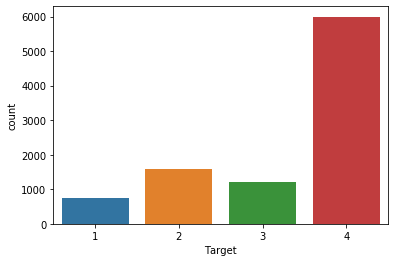

In [28]:
sns.countplot(x = 'Target',data = train)

### Question 3 : whether all the member of the house have the same poverty level

In [29]:
print('house id with diff poverty level:')
(train.groupby('idhogar')['Target'].nunique()>1).index

house id with diff poverty level:


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

### Question 4: house without a family head.

In [30]:
print('house without a family head :')
(train.groupby('idhogar')['parentesco1'].sum()==0).index

house without a family head :


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

### Question 5 : Set poverty level of the member & head of the house as same

In [31]:
target_mean = train.groupby('idhogar')['Target'].mean().astype('int64').reset_index().rename(columns = {'Target':'Target_mean'})

In [32]:
train = train.merge(target_mean,how = 'left',on='idhogar')
train.Target = train.Target_mean
train.drop('Target_mean',axis = 1,inplace = True)
train.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [33]:
# Drop idhogar column
train.drop(['idhogar'],axis = 1,inplace = True)
test.drop(['idhogar'],axis = 1,inplace = True)

In [34]:
train.shape,test.shape

((9557, 138), (23856, 137))

### Question 6: Count & remove null values

### Question 7 : Predicting Random forest classifier

In [36]:
y = train['Target']
x = train.drop(columns=['Target'])

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rf = RandomForestClassifier(min_samples_leaf=10,min_impurity_split=10,random_state = 1)
rf.fit(x,y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will chang

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=10,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
# predict sales
pred_train = rf.predict(x)
pred_train

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [42]:
# Check for accuracy
print('Accuracy Score:',accuracy_score(y,pred_train))
print('Confusion Matrix:',confusion_matrix(y,pred_train))
print('Classification report:',classification_report(y,pred_train))

Accuracy Score: 0.6246730145443131
Confusion Matrix: [[   0    0    0  858]
 [   0    0    0 1575]
 [   0    0    0 1154]
 [   0    0    0 5970]]
Classification report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       858
           2       0.00      0.00      0.00      1575
           3       0.00      0.00      0.00      1154
           4       0.62      1.00      0.77      5970

   micro avg       0.62      0.62      0.62      9557
   macro avg       0.16      0.25      0.19      9557
weighted avg       0.39      0.62      0.48      9557



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
# Cross validation
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rf,x,y,scoring='accuracy',cv=10)
print(cv)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

[0.62382445 0.62382445 0.62382445 0.62382445 0.62447699 0.62513089
 0.62513089 0.62513089 0.62578616 0.62578616]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m